# Лабораторная работа №5

### Выполнили: 
* Иванов Александр Константинович, 368220 
* Братушка Никита Игоревич, 367924
* Проворов Николай Дмитриевич, 368690


### Импортирование необходимых библиотек

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot, heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from time import time


Загрузим датасет для классификации и разделим его в соотношении 80/20 на обучающую и тестовую выборки соответственно:

In [23]:
heartrates = pd.read_csv(open("heart_modified.csv"))

print(heartrates.head()) # Выводим считанные данные

X = heartrates.drop("target", axis=1)
y = heartrates["target"]

X_train, X_tests, y_train, y_tests = train_test_split(X, y, test_size=0.2)

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.952197    1   3  0.763956 -0.256334    1        0  0.015443      0   
1 -1.915313    1   2 -0.092738  0.072199    0        1  1.633471      0   
2 -1.474158    0   1 -0.092738 -0.816773    0        0  0.977514      0   
3  0.180175    1   1 -0.663867 -0.198357    0        1  1.239897      0   
4  0.290464    0   0 -0.663867  2.082050    0        1  0.583939      1   

    oldpeak  slope  ca  thal  target  
0  1.087338      0   0     1       1  
1  2.122573      0   0     2       1  
2  0.310912      2   0     2       1  
3 -0.206705      2   0     2       1  
4 -0.379244      2   0     2       1  


# Бэггинг решающих деревьев (случайный лес, RandomForest)

С помощью удобного инструмента GridSearchCV выберем лучшие параметры для модели

In [32]:
classifier_rf = RandomForestClassifier(random_state=10)

param_rf = {
    "n_estimators": [20, 50, 100, 200],
    "max_depth" : [None, 5, 10, 20],
    "min_samples_split" : [2, 5, 10, 20]
}

grid_search_rf = GridSearchCV(estimator=classifier_rf, param_grid=param_rf, scoring="accuracy")

# Обучение 
time_fit_rf = time()
grid_search_rf.fit(X_train, y_train)
time_fit_rf = time() - time_fit_rf

# Предсказания модели на основе лучших параметров из grid_search_rf.best_estimator_ (уже обучена)
y_predict_rf = grid_search_rf.best_estimator_.predict(X_tests) 

In [25]:
# Параметры
print("Лучшие параметры:\n")
print("Количество деревьев(n_estimators): ", grid_search_rf.best_params_.get("n_estimators"))
print("Максимальная глубина деревьев (max_depth): ", grid_search_rf.best_params_.get("max_depth"))
print("Количество образцов в узле (min_samples_split): ", grid_search_rf.best_params_.get("min_samples_split"), "\n")

# Оценка (https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html)
print("Отчет о классификации:\n", classification_report(y_true=y_tests, y_pred=y_predict_rf))
print("Точность(accuracy): ", accuracy_score(y_true=y_tests, y_pred=y_predict_rf))
print("F1 (f1_score): ", f1_score(y_true=y_tests, y_pred=y_predict_rf))

precision_rf = classification_report(y_true=y_tests, y_pred=y_predict_rf, output_dict=True)["weighted avg"]["precision"]

Лучшие параметры:

Количество деревьев(n_estimators):  100
Максимальная глубина деревьев (max_depth):  None
Количество образцов в узле (min_samples_split):  20 

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.89      0.86      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Точность(accuracy):  0.8524590163934426
F1 (f1_score):  0.8732394366197183


# Градиентный бустинг над решающими деревьями (GradientBoostingRegressor)

In [35]:
classifier_gb = GradientBoostingClassifier(random_state=10)

param_gb = {
    "n_estimators": [20, 50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth" : [None, 5, 10, 20],
    "min_samples_split" : [2, 5, 10, 20]
}

grid_search_gb = GridSearchCV(estimator=classifier_gb, param_grid=param_gb, scoring="accuracy")

# Обучение 
time_fit_gb = time()
grid_search_gb.fit(X_train, y_train)
time_fit_gb = time() - time_fit_gb 

# Предсказания модели на основе лучших параметров из grid_search_gb.best_estimator_ (уже обучена)
y_predict_gb = grid_search_gb.best_estimator_.predict(X_tests) 

In [ ]:
# Параметры
print("Лучшие параметры:\n")
print("Количество деревьев(n_estimators): ", grid_search_gb.best_params_.get("n_estimators"))
print("Скорость обучения (learning_rate): ", grid_search_gb.best_params_.get("learning_rate"))
print("Максимальная глубина деревьев (max_depth): ", grid_search_gb.best_params_.get("max_depth"))
print("Количество образцов в узле (min_samples_split): ", grid_search_gb.best_params_.get("min_samples_split"), "\n")

# Оценка (https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html)
print("Отчет о классификации:\n", classification_report(y_true=y_tests, y_pred=y_predict_gb))
print("Точность(accuracy): ", accuracy_score(y_true=y_tests, y_pred=y_predict_gb))
print("F1 (f1_score): ", f1_score(y_true=y_tests, y_pred=y_predict_gb))

precision_gb = classification_report(y_true=y_tests, y_pred=y_predict_gb, output_dict=True)["weighted avg"]["precision"]

Лучшие параметры:

Количество деревьев(n_estimators):  20
Скорость обучения (learning_rate):  0.2
Максимальная глубина деревьев (max_depth):  5
Количество образцов в узле (min_samples_split):  20 

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        25
           1       0.87      0.75      0.81        36

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.80      0.79      0.79        61

Точность(accuracy):  0.7868852459016393
F1 (f1_score):  0.8059701492537313


# Сравнительная оценка

### Критерии оценивания

* Время обучения

* Точность, F1-мера и полнота

* Матрица ошибок

Время обучения RandomForest 15.18103 cекунд
Время обучения GradientBoosting 86.35924 cекунд 

Точность RandomForest: 0.85246
F1 RandomForest: 0.87324
Полнота RandomForest: 0.85374

Точность GradientBoosting: 0.78689
F1 GradientBoosting: 0.80597
Полнота GradientBoosting: 0.80090



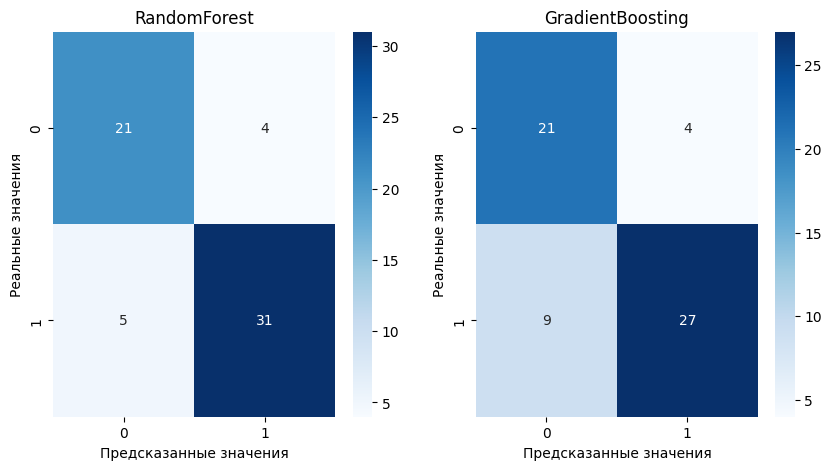

In [41]:
# Время обучения
print("Время обучения RandomForest {:.5f} cекунд".format(time_fit_rf))
print("Время обучения GradientBoosting {:.5f} cекунд \n".format(time_fit_gb))

# Точность, F1-мера и полнота
print("Точность RandomForest: {:.5f}".format(accuracy_score(y_true=y_tests, y_pred=y_predict_rf)))
print("F1 RandomForest: {:.5f}".format(f1_score(y_true=y_tests, y_pred=y_predict_rf)))
print("Полнота RandomForest: {:.5f}\n".format(precision_rf))

print("Точность GradientBoosting: {:.5f}".format(accuracy_score(y_true=y_tests, y_pred=y_predict_gb)))
print("F1 GradientBoosting: {:.5f}".format(f1_score(y_true=y_tests, y_pred=y_predict_gb)))
print("Полнота GradientBoosting: {:.5f}\n".format(precision_gb))

# Матрица ошибок
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_true=y_tests, y_pred=y_predict_rf), annot=True, fmt="d", cmap="Blues")
plt.title("RandomForest")
plt.xlabel("Предсказанные значения")
plt.ylabel("Реальные значения")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_true=y_tests, y_pred=y_predict_gb), annot=True, fmt="d", cmap="Blues")
plt.title("GradientBoosting")
plt.xlabel("Предсказанные значения")
plt.ylabel("Реальные значения")

plt.show()
